# THE NORTH FACE - ECOMMERCE ANALYSIS
## PREPROCESSING: CLEANING OF DATA

In [2]:
!pip install spacy -q

In [62]:
# Importing useful libraries

import pandas as pd
import spacy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df = pd.read_csv('sample-data-ecommerce.csv')
df.head()

,id,description
0,1,Active classic boxers - There's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...
2,3,Active sport briefs - These superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an..."


In [89]:
df.drop("id", axis = 1, inplace = True)
df.head()

,description
0,Active classic boxers - There's a reason why o...
1,Active sport boxer briefs - Skinning up Glory ...
2,Active sport briefs - These superbreathable no...
3,"Alpine guide pants - Skin in, climb ice, switc..."
4,"Alpine wind jkt - On high ridges, steep ice an..."


In [20]:
# Examining number of article descriptions
df.shape

(500, 1)

### 1. CLEANING DESCRIPTIONS

In [21]:
# Removing punctuation and lower case all doc
df['clean_description'] = df['description'].str.replace(r"[^A-Za-z0-9 ]+", " ")
df['clean_description'] = df['clean_description'].fillna('').apply(lambda x: x.lower())

df.head()

,description,clean_description
0,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why o...
1,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory ...
2,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no...
3,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switc...
4,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice an...


### 2. REMOVING STOP WORDS

In [22]:
# Downloading model 
!python -m spacy download en_core_web_sm -q

# Importing English using en_core_web_sm.load()
import en_core_web_sm
nlp = en_core_web_sm.load()

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [36]:
# Importing stop words from spacy 
from spacy.lang.en.stop_words import STOP_WORDS

## Tokenizing the cleaned document
tokenized_doc = df['clean_description'].fillna('').apply(lambda x: nlp(x))

# removing stop-words and numbers
tokenized_doc = tokenized_doc.apply(lambda x: 
                                    [token.lemma_ for token in x 
                                     if (token.text not in STOP_WORDS) & (token.like_num == False)])

In [37]:
# Adding a clean column to the dataframe
df["clean_token"] = [" ".join(x) for x in tokenized_doc]
df.head()

,description,clean_description,clean_token
0,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why o...,active classic boxer s reason boxer cult fa...
1,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory ...,active sport boxer brief skin glory require...
2,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no...,active sport brief superbreathable fly brie...
3,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switc...,alpine guide pant skin climb ice switch...
4,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice an...,alpine wind jkt high ridge steep ice alpi...


In [53]:
# Verifying if we need to had words to the STOP WORDS list
# Putting all descriptions together in one string
corpus = ""
for i in df.index:
    corpus += df.iloc[i,2]

# Building a list of all words from all descriptions
list_words = corpus.split() 

# Creating a Dataframe of all words
list_wordsdf = pd.Series(list_words)

# Creating a mask of all counted values greater than 200
common = list_wordsdf.value_counts() > 200

# Applying mask
common = common[common]

display(common)
print(common.shape)

li             True
br             True
b              True
oz             True
recycle        True
ul             True
fabric         True
pocket         True
polyester      True
recyclable     True
thread         True
common         True
program        True
detail         True
weight         True
g              True
organic        True
cotton         True
soft           True
water          True
durable        True
zipper         True
nylon          True
dry            True
finish         True
dwr            True
seam           True
s              True
spandex        True
stretch        True
repellent      True
provide        True
shoulder       True
t              True
breathable     True
fit            True
lightweight    True
shirt          True
zip            True
inseam         True
strap          True
mesh           True
hem            True
skin           True
dtype: bool

(44,)


In [55]:
# Updating stop words with words that won't help for analysis
new_stop_words = ["li", "br", "b", "oz", "ul", "g", "s", "t", "dwr","common","hem"]

STOP_WORDS_updated = STOP_WORDS.union(new_stop_words)

In [57]:
## Tokenizing the cleaned document
tokenized_doc_2 = df['clean_token'].fillna('').apply(lambda x: nlp(x))

# removing new stop words
tokenized_doc_2 = tokenized_doc_2.apply(lambda x: 
                                    [token.lemma_ for token in x 
                                     if token.text not in STOP_WORDS_updated])
# Updating the clean column to the dataframe
df["clean_token"] = [" ".join(x) for x in tokenized_doc_2]
df.head()

,description,clean_description,clean_token
0,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why o...,active classic boxer reason boxer cult fav...
1,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory ...,active sport boxer brief skin glory requir...
2,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no...,active sport brief superbreathable fly bri...
3,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switc...,alpine guide pant skin climb ice swi...
4,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice an...,alpine wind jkt high ridge steep ice al...


In [87]:
# Saving the clean_token column in a dataset for further analysis
df["clean_token"].to_csv('Cleaned_descriptions.csv', index = False)

### 3. CREATING TF-IDF MATRIX

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vector
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['clean_token'])

# X is a generator. We can transform that as an array
dense = X.toarray()
dense

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
# Create a tf-idf matrix for each token and each document
matrix = pd.DataFrame(dense, 
             columns=[x for x in vectorizer.get_feature_names()])
matrix.head()

,11c,12d,3d,abandon,ability,able,abrasion,abrasive,abroad,absolute,...,yoke,yosemite,young,yvon,zinger,zip,zipper,zippered,zipping,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.142494,0.256837,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.141109,0.000000,0.0,0.0


In [83]:
# Saving the tf-idf matrix in a csv for further analysis

matrix.to_csv("TF-IDF_Matrix.csv")

## VISUALIZATION

### WORD CLOUD

In [66]:
# Putting all descriptions together in one string
corpus_clean = ""
for i in df.index:
    corpus_clean += df.iloc[i,2]

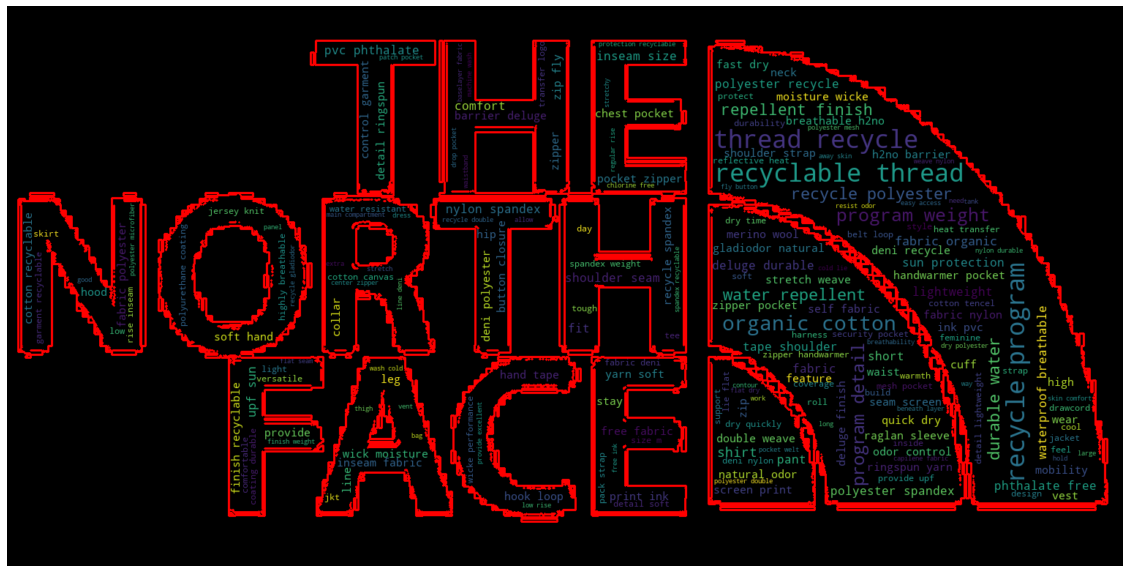

In [100]:
from os import path
from PIL import Image
import os

from wordcloud import WordCloud

# Getting data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()


# Reading the mask image
northface_mask = np.array(Image.open(path.join(d, "north-face-logo.jpg")))


wc = WordCloud(background_color = "black", max_words = 200, mask = northface_mask,
               contour_width = 2, contour_color = 'red')

# generate word cloud
wc.generate(corpus_clean)

# store to file
wc.to_file(path.join(d, "northface_wordcloud.png"))

# show
plt.figure(figsize = (20,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()